# Stats and Public Health Part 1

## Introduction
The following notebook breaks down various EDA cleansing and analyses to provide foundational knowledge surrounding the West Nile Virus dataset, which contains the tracking and testing of mosquito populations throughout the city of Chicago.

## Part One: Basic Data Wrangling
The first section of the notebook entails basic data cleansing and understanding of data formats and distributions

#### Import Appropriate Libraries

In [797]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import CSV file, see preview of the dataset

In [798]:
df = pd.read_csv('/Users/scolelli/Downloads/mosquito_data.csv')
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


### Q1.1: Find the shape of the dataframe
The shape function in the numpy package outputs the number of total rows and columns that exist in the dataframe. The information is also provided at the end of the dataset when just calling `df`, but `np.shape()` simply outputs a tuple of the number of rows and columns.

In [799]:
# 1.1: Shape of the dataframe

np.shape(df)

(18495, 13)

### Q1.2: Convert the Date Column to a datetime format
Within the initital project outline, the data type for each column is specified including Date, which is currently stored as a string, or object. This will lead to issues if we wish to leverage Date throughout the analysis.

##### Step 1: Check existing datatypes
Assuming we did not receive that data type definition beforehand, the first step would be to check the data types for all columns

In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


##### Step 2: Change datatype for Date
To change the data type of a dataframe, the pandas library provides `.astype()` which allows for the transformation of one dtype to another

In [801]:
df['Date'].astype('datetime64')

0       2019-09-26 00:09:00
1       2019-09-26 00:09:00
2       2019-09-26 00:09:00
3       2019-09-26 00:09:00
4       2019-09-26 00:09:00
                ...        
18490   2016-09-09 00:09:00
18491   2007-08-24 00:08:00
18492   2016-07-27 00:07:00
18493   2017-08-17 00:08:00
18494   2015-08-20 00:08:00
Name: Date, Length: 18495, dtype: datetime64[ns]

Another option is to invoke another function in pandas, `.to_datetime()`, which essentially performs that same function as `.astype()`

In [802]:
df['Date'] = pd.to_datetime(df['Date'])

##### Step 3: Confirm changes
The last step would be to confirm the data type change by either again invoking `df.info()` or calling the Date column directly.

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


In [804]:
df['Date']

0       2019-09-26 00:09:00
1       2019-09-26 00:09:00
2       2019-09-26 00:09:00
3       2019-09-26 00:09:00
4       2019-09-26 00:09:00
                ...        
18490   2016-09-09 00:09:00
18491   2007-08-24 00:08:00
18492   2016-07-27 00:07:00
18493   2017-08-17 00:08:00
18494   2015-08-20 00:08:00
Name: Date, Length: 18495, dtype: datetime64[ns]

### Q1.3: Pick 2 Numerical & 2 Categorical columns. What are they storing and how are they distributed?
The distinction between a numerical and a categorical data type is that the former is usually considered continuous while the latter is considered discrete.

Continuous: Data type that falls anywhere on a number line or sequence, technically in an infinite space.

Discrete: Data type that falls within a specific classification or finite, defined space.

It is important to note that certain data can be both discrete or continuous depending on their storage and presentation. Time is a good example of this, especially seen in this dataset. The Week column, although numeric, can be considered categorical in this case due to the fact that there is clear start and end for each column (1 to 52). On the other hand, datatime, which is on a seconds basis, can be considered continuous since it can fall anywhere on the number line.

Interestingly enough, many of the numeric data types in this dataset to have discrete attributes:
* Year: Fixed from 2008 to 2019
* Week: Fixed from 20 to 40 (excludes winter weeks)
* Block: Fixed, dependent on the number of fixed traps
* Mosquito Number: Each batch is capped at the number 50

Regardless of the distinction between continuous and discrete, another important aspect of differentiating numerical and categorical data types is the representation of these data, which will be further discussed below.

##### Step 1: See all data types

In [805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


##### Step 2: Visualize 2 numeric columns (Mosquito Number & Latitude)

For numerical data types, the best visualization to understand distribution of data points is via histogram, where the segmentation of data points is based on predefined bin counts.

Since there are no categories to segment the data, a histogram will use bin counts to group the data based on the number range available in the dataset.

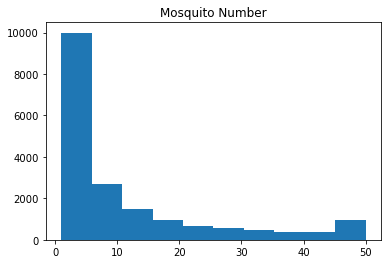

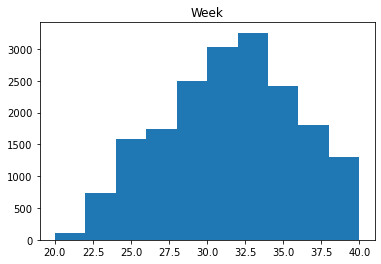

In [806]:
plt.figure()
plt.hist(df['Mosquito number'], bins = 10)
plt.title('Mosquito Number')
plt.show()

plt.figure()
plt.hist(df['Week'], bins = 10)
plt.title('Week')
plt.show()

Mosquito Number: This column contains the number of mosquitos that have been trapped and tested at a given point in time. We see that the vast majority of tests are distributed towards a smaller number of mosquitos per test. The increase in the bin representing 45-50 mosquitos per test is due to the fact that a batch of mosquitos is capped at 50, and when a batch exceeds 50, it is separated into a new entry.

Week: This column represents the number week of the year that a test is conducted. We see a fairly normal distribution here, where the weeks in the middle of the year see the most tests. This makes logical sense, since mosquitos are most prevalent in the summer months.

##### Step 3: Visualize 2 categorical columns (Species & Trap Types)

For categorical data types, the best visualization to understand data distributions is through bar plots, where the distribution of data points is based on the categories or classifications that are already defined in the dataset.

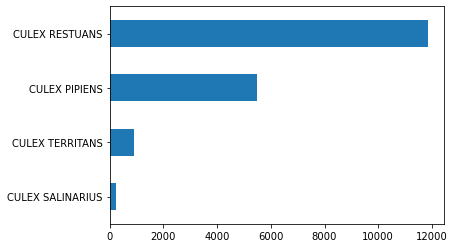

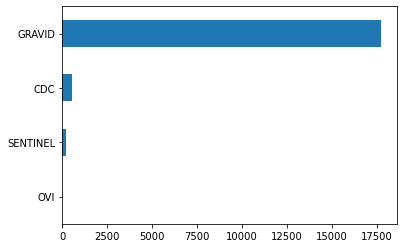

In [807]:
df['Species'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

df['Trap type'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

#### Q4: Remove any dupliate information
A core part of any data analysis is ensuring consistent and reliable source datasets. It is common to find erronious information within any dataset to a variety of factors and it is important to mitigate the risk of inaccurate conclusions stemming from these errors.

One of the most common errors is the existence of duplicate information, which could improperly skew your analysis towards a specific outcome.

##### Step 1: Check for total number of duplicates
The pandas library has a built-in function specifically tailored towards this issues, known as `.duplicated()`. The addition of .sum() simply allows for the total number of duplicate records as opposed to only viewing a boolean of the each row in the dataframe, specifying if a row is a duplicate or not.

In [808]:
df.duplicated().sum()

658

##### Step 2: Check for prevalence of duplicates
While understanding the total number of duplicates is important, it is equally important to understand the ratio of duplicate entries relative to all entries in the dataframe.

In the first function called in the dataset, we found that there were 18,495 rows. The function below simply divided the sum of duplications by that first number, calling the same `.shape()` function used previously.

After multiplying the ratio by 100, we find that percentage of duplicate entires relative to the entire dataset.

In [809]:
df.duplicated().sum() / df.shape[0] * 100

3.5577183022438494

##### Step 3: Visualize duplicates to confirm
Although confident in the above, it is important to visualize the duplicates to ensure that the duplicate records identified are indeed duplicates.

To do this, we create a temporary dataframe that only contains the rows that have been identified as duplicates using the same `.duplicated()` function used previously. From there, we use that temporary dataframe to filter the source dataframe using the `.loc` function. Since the two dataframes follow the same schema, `.loc` will use the index specified in the temporary dataframe to only show duplicated rows.

In [810]:
dup_df = df.duplicated(keep = False)
df.loc[dup_df, :].sort_values(by = 'Date')

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
17733,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
14942,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
17486,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
17613,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
14703,2007,31,65XX N OAK PARK AVE,65,T143,GRAVID,2007-08-07 00:08:00,29,Pip,positive,CULEX PIPIENS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15760,2019,34,100XX W OHARE AIRPORT,100,T901,GRAVID,2019-08-22 00:08:00,16,Res,positive,CULEX RESTUANS,NaN,NaN
18239,2019,34,100XX W OHARE AIRPORT,100,T901,GRAVID,2019-08-22 00:08:00,16,Res,positive,CULEX RESTUANS,NaN,NaN
17206,2019,35,100XX W OHARE AIRPORT,100,T913,GRAVID,2019-08-29 00:08:00,3,Res,positive,CULEX RESTUANS,NaN,NaN
16769,2019,35,100XX W OHARE AIRPORT,100,T913,GRAVID,2019-08-29 00:08:00,3,Res,positive,CULEX RESTUANS,NaN,NaN


##### Step 4: Visualize entries where 'Mosquito number' equals 50
In the initial project outline, it specifies that when a batch of mosquitos reaches 50, it is capped and a new data entry is created. However, it doesn't specify if the 'Date' column is the same and we are unsure if the batches are technically tested and the exact same date and time.

We'll visualize the duplicated dataframe for entries where the 'Mosquito number' is 50 to try to gain more insight.

In [811]:
df[(df['Mosquito number'] == 50)].loc[dup_df, :].sort_values(by = 'Date')

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
17605,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
17442,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
14656,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
15941,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
16648,2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,2018,25,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-06-21 00:06:00,50,Res,positive,CULEX RESTUANS,NaN,NaN
18329,2018,25,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-06-21 00:06:00,50,Res,positive,CULEX RESTUANS,NaN,NaN
15542,2018,25,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-06-21 00:06:00,50,Res,positive,CULEX RESTUANS,NaN,NaN
17398,2018,26,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-06-28 00:06:00,50,Res,positive,CULEX RESTUANS,NaN,NaN


We find that there are 100 rows of duplicates where the 'Mosquito number' equals the 50 cap per entry, which is about 12% of all duplicate columns (862 rows in Step 3).

Additionally, we see that in the summary of the filtered dataframe, the 'WNV Present' column is positive in each entry.

Let's filter the dataframe down even more to see if all 100 rows specify the presence of WNV.

In [812]:
df[(df['Mosquito number'] == 50) & (df['WNV Present'] == 'positive')].loc[dup_df, :].sort_values(by = 'Date')

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
17605,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
17442,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
14656,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
15941,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
16648,2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,2018,25,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-06-21 00:06:00,50,Res,positive,CULEX RESTUANS,NaN,NaN
18329,2018,25,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-06-21 00:06:00,50,Res,positive,CULEX RESTUANS,NaN,NaN
15542,2018,25,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-06-21 00:06:00,50,Res,positive,CULEX RESTUANS,NaN,NaN
17398,2018,26,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-06-28 00:06:00,50,Res,positive,CULEX RESTUANS,NaN,NaN


Indeed, every single entry of duplicated records with 'Mosquito number' equaling 50 also has 'WNV Present' being positive.

Since there is uncertainty around the batch segmentations and testing times, and how potentially significant the presence of these line items can skew the analysis, this should definitely be a point of emphasis to follow-up with from a business requirements perspecive.

##### Step 5: Removal of duplicates
For right now, we will move forward with the decision to remove all duplicate listings, with the priority in mind to confirm the above uncertainties.

To drop the duplicates, we simply call the function `.drop_duplicates()` from the pandas library. Since the changes do not persist, we'll need to create a new dataframe with these changes.

In [813]:
df2 = df.drop_duplicates().copy()

##### Step 6: Confirm if any columns are duplicated
Lastly, we'll check to see if any columns are duplicated using the `.T.duplicated()` function.

In [814]:
df2.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

#### Q5: Check for & Remediate Null Values
Another very common dataset error is the existence of null values. Either due to a lack of data points or error in the initial data collection pipeline, null values represent fields within a data entry that does not have a data point specified.

The can lead to either skewed or a misrepresentation of the truth, or can just be difficult to navigate when Null Values are sporadically present throughout a dataset.

##### Step 1: Check for total number of nulls in each column
The pandas library has a function known as `.isna()` which, similar to `.duplicated()`, will provide a boolean specifying whether there is a Null Value. However, the `.isna()` differs from the `.duplicated()` output, since `.isna()` is determined by column, while `.duplicated()` is determinded by row.

When again attach `.sum()` to this function for the total number of Null Values, `.isna()` will specify the number of Null Values per column.

In [815]:
df2.isna().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

##### Step 2: Determine the prevalence of Nulls relative to the entire column
To better gauge how many nulls are within Latitude and Longitutde, we'll divide the number of Nulls by the total number of values within each column.

In [816]:
df2.isna().sum() / df2.shape[0] * 100

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

##### Step 3: Prevalence of missing Latitude & Longitutde per Trap
Since the 'Lat' and 'Lon' columns represent the location of traps throughout the city, it's important to understand which traps contain null values and the extent to the missing location data.

Ideally speaking, if the ratio of Null lat and lon values is less than 100% per trap, we should be able to fill in the Null Values with the appropriate location data for each trap. But first, we need to find that ratio.

The first step within Step 3 is to filter the dataframe of all traps that are missing location data. Since Lat & Lon have the same exact number of Null Values, we are going to assume that when a value in the Lat column is Null, it is also Null in the Lon column.

To find the number of Null Values for 'Lat', grouped by Trap, build the following argument:
* `df2.loc[:,['Trap','Lat']]`: Select all rows in the dataframe, but only the 'Trap' and 'Lat' columns
* `[df2['Lat'].isna()]`: Filter selection for all rows where 'Lat' is Null
* `.groupby('Trap')['Trap'].count()`: Based on the above filters, group that dataframe subset by the unique Trap ID, and then count the number of times that Trap ID exists within the filtered subset
* `null_lat_traps`: For easier usage of the argument in the coming arguments, we'll save this to a variable

In [817]:
null_lat_traps = (df2.loc[:,['Trap','Lat']][df2['Lat'].isna()]).groupby('Trap')['Trap'].count()
null_lat_traps

Trap
T035     12
T068    116
T083    127
T100     11
T103     32
T135    264
T143     17
T145     10
T900    114
T901     94
T902    127
T903     89
T904     68
T905    151
T906    112
T907     20
T908     14
T909     21
T910     50
T911     22
T912    184
T913    211
T914      3
T915     59
T916    145
T917      3
T918     57
T920      7
T921      8
T923     44
T924     35
T925     39
Name: Trap, dtype: int64

Now that we've found the total number of Null 'Lat' values per Trap, we want to find the total number of 'Lat' trap values per Trap to understand the prevelance of Null location data for each Trap.

* `df2.groupby('Trap')['Trap'].count()`: Using the same groupby function as null_lat_traps, but without the 'Lat' Null Value filter.
* `all_lat_traps`: Variable function for future use

In [818]:
all_lat_traps = df2.groupby('Trap')['Trap'].count()
all_lat_traps

Trap
220A       4
T001       7
T002     406
T002A     10
T002B      2
        ... 
T920       7
T921       8
T923      44
T924      35
T925      39
Name: Trap, Length: 190, dtype: int64

Next, we will find the ratio of Null 'Lat' Values relative to all 'Lat' Values for each trap.

In [819]:
df_traps = (null_lat_traps / all_lat_traps * 100)
df_traps[df_traps > 0]

Trap
T035      7.643312
T068    100.000000
T083    100.000000
T100    100.000000
T103    100.000000
T135    100.000000
T143    100.000000
T145    100.000000
T900    100.000000
T901    100.000000
T902    100.000000
T903    100.000000
T904    100.000000
T905    100.000000
T906    100.000000
T907    100.000000
T908    100.000000
T909    100.000000
T910    100.000000
T911    100.000000
T912    100.000000
T913    100.000000
T914    100.000000
T915    100.000000
T916    100.000000
T917    100.000000
T918    100.000000
T920    100.000000
T921    100.000000
T923    100.000000
T924    100.000000
T925    100.000000
Name: Trap, dtype: float64

##### Step 4: Fill Null Values for Trap T035
As seen above, all Traps with Null 'Lat' Values are missing the location data throughout the entire dataset except for one trap: T035.

We'll first filter the dataframe for all entries with T035 and Null 'Lat' Values.

In [820]:
df2[(df2['Trap'] == 'T035') & (df2['Lat'].isna() == True)]

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
13806,2007,39,30XX S HOYNE,30,T035,GRAVID,2007-10-04 00:10:00,14,Pip,negative,CULEX PIPIENS,NaN,NaN
13986,2007,37,30XX S HOYNE,30,T035,GRAVID,2007-09-18 00:09:00,2,Pip,negative,CULEX PIPIENS,NaN,NaN
13995,2007,37,30XX S HOYNE,30,T035,GRAVID,2007-09-18 00:09:00,1,Ter,negative,CULEX TERRITANS,NaN,NaN
14002,2007,36,30XX S HOYNE,30,T035,GRAVID,2007-09-12 00:09:00,1,Pip,negative,CULEX PIPIENS,NaN,NaN
14296,2007,34,30XX S HOYNE,30,T035,GRAVID,2007-08-24 00:08:00,2,Pip,negative,CULEX PIPIENS,NaN,NaN
14404,2007,33,30XX S HOYNE,30,T035,GRAVID,2007-08-21 00:08:00,5,Pip,negative,CULEX PIPIENS,NaN,NaN
14422,2007,33,30XX S HOYNE,30,T035,GRAVID,2007-08-21 00:08:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
14500,2007,32,30XX S HOYNE,30,T035,GRAVID,2007-08-15 00:08:00,4,Pip,negative,CULEX PIPIENS,NaN,NaN
14592,2007,32,30XX S HOYNE,30,T035,GRAVID,2007-08-15 00:08:00,1,Res,positive,CULEX RESTUANS,NaN,NaN
14724,2007,31,30XX S HOYNE,30,T035,GRAVID,2007-08-07 00:08:00,1,Res,negative,CULEX RESTUANS,NaN,NaN


Next, for all T035 entries where 'Lat' & 'Lon' values that aren't Null, we'll look to find the appropriate values to fill the Null Values with.

In [821]:
print(df2[df2['Trap'] == 'T035'].groupby('Lat')['Lat'].count())
print(df2[df2['Trap'] == 'T035'].groupby('Lon')['Lon'].count())

Lat
41.763371    128
41.763371      1
41.763371      1
41.763371      1
41.763372      1
41.763373      1
41.763374      1
41.763374      1
41.763374      1
41.763375      1
41.763375      1
41.763375      1
41.763375      1
41.763376      1
41.763377      1
41.763378      1
41.763379      1
41.763379      1
Name: Lat, dtype: int64
Lon
-87.637873    128
-87.637872      1
-87.637872      1
-87.637872      1
-87.637872      1
-87.637871      1
-87.637871      1
-87.637870      1
-87.637870      1
-87.637869      1
-87.637869      1
-87.637868      1
-87.637868      1
-87.637867      1
-87.637867      1
-87.637865      1
-87.637865      1
-87.637864      1
Name: Lon, dtype: int64


Although there is a bit of a range of values, it is clear that the vast majority of T035 entries are identified under a single 'Lat' & 'Lon' value. We'll fill is Null Values with these values.

Although the below arguments look long, they are relatively simple.
* `df2[(df2['Trap'] == 'T035') & (df2['Lat'].isna() == True)]`: Filter the dataframe for the rows with the T035 trap and Null 'Lat' Values.
* `= df2[(df2['Trap'] == 'T035') & (df2['Lat'].isna() == True)].fillna(41.763371)`: Make that filter equal to the dataframe with the same filter, but also specifying the `.fillna() clause`

`.fillna()` is from the pandas library that will replace Null Values with the specified value.

In [822]:
df2[(df2['Trap'] == 'T035') & (df2['Lat'].isna() == True)] = df2[(df2['Trap'] == 'T035') & (df2['Lat'].isna() == True)].fillna(41.763371)
df2[(df2['Trap'] == 'T035') & (df2['Lon'].isna() == True)] = df2[(df2['Trap'] == 'T035') & (df2['Lon'].isna() == True)].fillna(-87.637873)

In [823]:
df100 = df2[df['Trap'].str.contains('A') | df['Trap'].str.contains('B')].sort_values(by = 'Trap')

df100.to_csv('/Users/scolelli/Downloads/gauge.csv')

/var/folders/lb/vxhdzz_128l9mjh0gmf_1d2c0000gq/T/ipykernel_49154/273176979.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df100 = df2[df['Trap'].str.contains('A') | df['Trap'].str.contains('B')].sort_values(by = 'Trap')


##### Step 6: Fill Nulls for Other Traps
Since all other traps have Null ['Lat'] Values across the dataset, we'll take a look at the 'Block' to see if we can find a representative 'Lat' and 'Lon' Value.

In [824]:
null_lat_block = (df2.loc[:,['Block','Lat']][df2['Lat'].isna()]).groupby('Block')['Block'].count()
all_lat_block = df2.groupby('Block')['Block'].count()
df_block = (null_lat_block / all_lat_block * 100)
null_lat_ratio = df_block[df_block > 0]
null_lat_ratio

Block
4       50.381679
43     100.000000
65      89.473684
79      76.047904
81     100.000000
98     100.000000
100    100.000000
115     82.051282
Name: Block, dtype: float64

Since there are 4 blocks that have valid 'Lat' Values, we'll build a for loop to fill in the Null Values. But first, we'll find the mean, median, and mode to ensure that the existing 'Lat' Values are consistent for each block.

In [825]:
null_blocks = df2[(df2['Lat'].isna() == True)]['Block'].unique()

In [826]:
for block in null_blocks:
    print(block)
    print(df2[(df2['Block'] == block)]['Lat'].mean())
    print(df2[(df2['Block'] == block)]['Lat'].median())
    print(df2[(df2['Block'] == block)]['Lat'].mode())

100
nan
nan
Series([], Name: Lat, dtype: float64)
4
41.659252436558866
41.659236018
0    41.659236
Name: Lat, dtype: float64
81
nan
nan
Series([], Name: Lat, dtype: float64)
79
41.97418436770787
41.974182874
0    41.974183
Name: Lat, dtype: float64
98
nan
nan
Series([], Name: Lat, dtype: float64)
65
41.775428607
41.775428607
0    41.775429
Name: Lat, dtype: float64
115
41.683726704077756
41.683724975
0    41.683725
Name: Lat, dtype: float64
43
nan
nan
Series([], Name: Lat, dtype: float64)


Now that consistency is confirmed, we'll build the for loop to leverage `.fillna()` for each appropriate block

In [827]:
for block in null_blocks:
    df2[(df2['Block'] == block) & (df2['Lat'].isna() == True)] = df2[(df2['Block'] == block) & (df2['Lat'].isna() == True)].fillna(df2[(df2['Block'] == block)]['Lat'].mean())
    df2[(df2['Block'] == block) & (df2['Lon'].isna() == True)] = df2[(df2['Block'] == block) & (df2['Lon'].isna() == True)].fillna(df2[(df2['Block'] == block)]['Lon'].mean())

## Part 2: Basic EDA
Now that preliminary data cleansing is complete, the next section of the notebook will cover high-level, exploratory visualizations to provide a better understanding of the relationships across different data points.

### Q2.1: Explore the Relationship between Mosquito Number & Date

As opposed to using the 'Date' datetime format, which creates many more data points that would be difficult to visualize in a notebook-style plot, we created a new column that concatenated 'Year' & 'Week'.

By creating this new column, we can find the average number of mosquitos per year and week and allow for a clearer understanding of the trend of mosquito numbers over time.

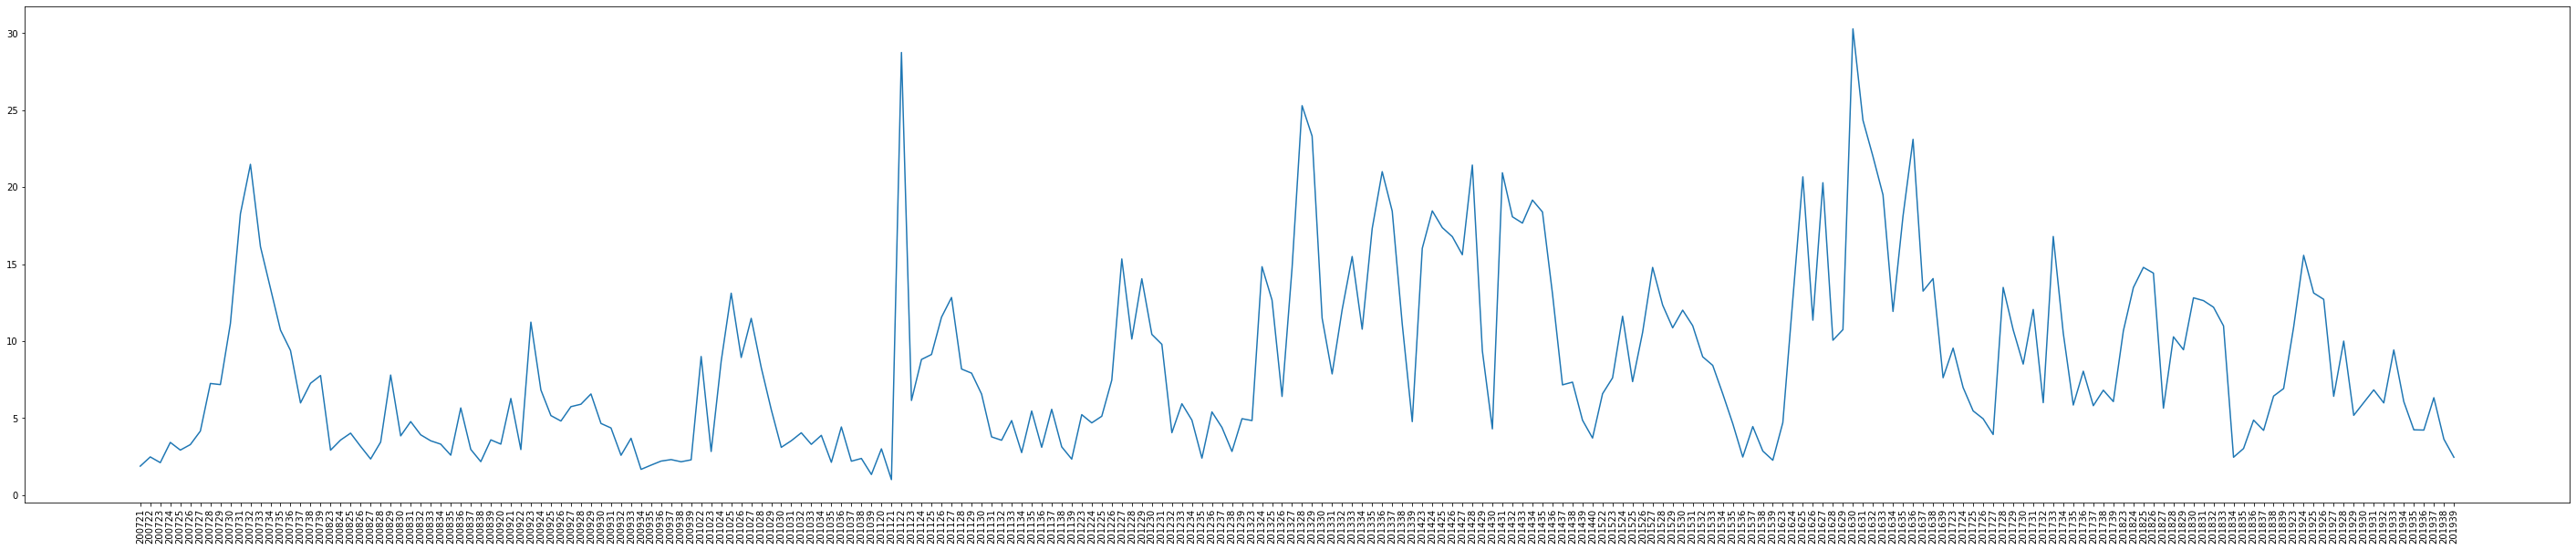

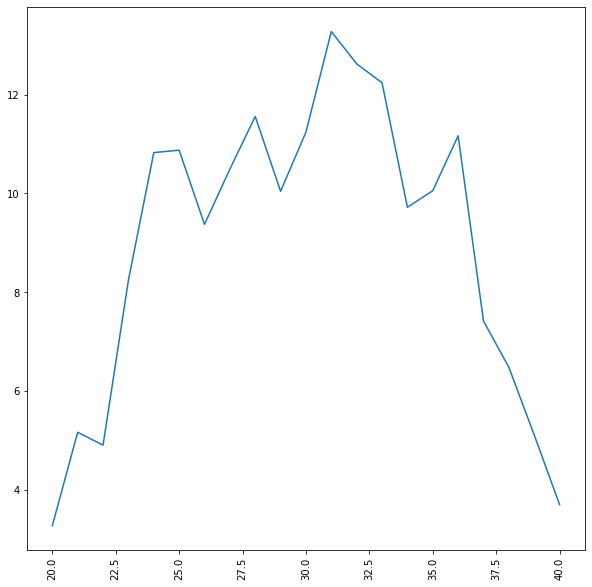

In [828]:
df2['Year-Week'] = df2['Year'].astype(str) + df2['Week'].astype(str)

#df2.loc[:, ['Week', 'Mosquito number']].groupby('Week').mean()
year_week_avg = df2.loc[:, ['Year-Week', 'Mosquito number']].groupby('Year-Week').mean()
week_number_avg = df2.loc[:, ['Week', 'Mosquito number']].groupby('Week').mean()

plt.figure(figsize = (50,10))
plt.plot(year_week_avg)
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (10,10))
plt.plot(week_number_avg)
plt.xticks(rotation = 90)
plt.show()


The top graph shows the trend of average Mosquito Numbers over time, by week. While we seem to see general increases in mosquito numbers over time, we also see a trend that seems to be extremely cyclical.

To dive deeper into this cycle, we plotted average Mosquito Numbers by week, regardless of the year. This helps us understand the trend of increased mosquito numbers during the summer months, which was already assumed in the histogram plot in Part 1.

## Part 3: Advanced EDA
The last section of the notebook will handle Advanced EDA, which will take a more in-depth look into the possible relationships across all of the data points available. This part meant to draw conclusions regarding which columns and relationships show the strongest evidence towards further predicition-based analysis and potential mitigation of WNV in the city of Chicago.

### Q3.1: Explore relationship between mosquito species and WNV prevalence

To better understand the relationship between species and WNV prevalence, we'll perform a pivot-style groupby and finding the ratio of negative and positive testing of WNV for each species type.

##### Step 1: Count test results by Species

We'll first count the number of negative and positive test results by species. The `.groupby()` function, similar to `GROUP BY` in SQL, groups together specific columns from the dataframe, followed by a certain quantitative function, which in this case, will be `.count`

In [829]:
df2.groupby(['Species', 'WNV Present'])['Species'].count()

Species           WNV Present
CULEX PIPIENS     negative       4074
                  positive       1237
CULEX RESTUANS    negative       9309
                  positive       2078
CULEX SALINARIUS  negative        215
                  positive          7
CULEX TERRITANS   negative        903
                  positive         14
Name: Species, dtype: int64

##### Step 2: Divide test result count by total count

To find the ratio of a specific test result relative to all test results for a specific species, we'll simply divide the above results by the same `.groupby()` and `.count()` function, but now excluding WNV test results.

In [830]:
wmv_by_species = df2.groupby(['Species', 'WNV Present'])['Species'].count() / df2.groupby('Species')['Species'].count()
wmv_by_species

Species           WNV Present
CULEX PIPIENS     negative       0.767087
                  positive       0.232913
CULEX RESTUANS    negative       0.817511
                  positive       0.182489
CULEX SALINARIUS  negative       0.968468
                  positive       0.031532
CULEX TERRITANS   negative       0.984733
                  positive       0.015267
Name: Species, dtype: float64

##### Step 3: Visualize Results

Lastly, we'll plot this ratio on a graph with specific color codes representing positive or negative test results. Since are overlaying 3 separate variables (Species, WNV test results, and the ratio between the two), we'll use a horizontal bar plot with color codes.

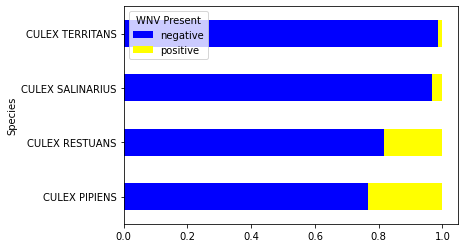

In [831]:
wmv_by_species.unstack().plot(kind = 'barh', stacked = True, color = ['blue', 'yellow'])
plt.show()

The above analysis and visualization show us that the Culex Pipens species has the highest likelihood of producing positive test results, with a positive test rate of 23.2% of the time. Culex Resuans, which is the most common type of mosquito trapped, has the second highest positive test rate of 18.2%

### Q3.2: Explore the relationship between the number of mosquitos caught and trap type

##### Step 1: Group Trap Type by Number of Mosquitos
The first step, similar to the previous plot, is to again perform `groupby.()` to aggregate the sum of mosquito numbers by trap type.

In [832]:
data = df2.groupby(['Trap type']).sum('Mosquito number')['Mosquito number'].sort_values()
data

Trap type
OVI              1
SENTINEL      5134
CDC           9514
GRAVID      171905
Name: Mosquito number, dtype: int64

##### Step 2: Visualize results
Due to the categorical nature of Trap Type, a bar plot makes most sense for this visualization.

<AxesSubplot:xlabel='Trap type'>

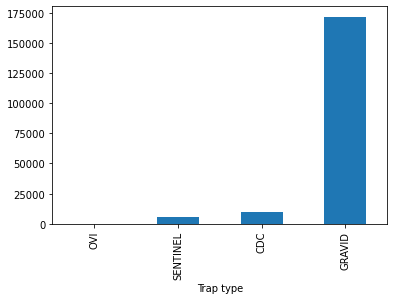

In [833]:
data.plot(kind = 'bar')

### Q3.3: Create Additional Insight of Your Choice
To achieve a better understanding of the relationships between all variables, the following insight will summarize a lot of the points stated throughout this workbook into a group of visualizations.

##### Step 1: Create dataframes for categorical and numerical data types
As previously states, numerical data types are best represented via histograms, while categorical data types are best represented via bar plots. Creating separate dataframes for each can help automate the generation of the most applicable visualizations.

In [834]:
# dropping 'Year-Week since it was not part of original dataset'
df2 = df2.drop(columns = ['Year-Week'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             17837 non-null  int64  
 1   Week             17837 non-null  int64  
 2   Address Block    17837 non-null  object 
 3   Block            17837 non-null  int64  
 4   Trap             17837 non-null  object 
 5   Trap type        17837 non-null  object 
 6   Date             17837 non-null  object 
 7   Mosquito number  17837 non-null  int64  
 8   Mosquito ID      17837 non-null  object 
 9   WNV Present      17837 non-null  object 
 10  Species          17837 non-null  object 
 11  Lat              16023 non-null  float64
 12  Lon              16023 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 2.4+ MB


In [835]:
cat_df = df2.select_dtypes('object')
cat_df

,Address Block,Trap,Trap type,Date,Mosquito ID,WNV Present,Species
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
...,...,...,...,...,...,...,...
18489,63XX W 64TH ST,T155,GRAVID,2013-08-29 00:08:00,Pip,positive,CULEX PIPIENS
18490,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,Pip,positive,CULEX PIPIENS
18491,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,Pip,positive,CULEX PIPIENS
18492,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,Res,positive,CULEX RESTUANS


In [836]:
num_df = df2.select_dtypes(['int', 'float'])
num_df

,Year,Week,Block,Mosquito number,Lat,Lon
0,2019,39,100,2,NaN,NaN
1,2019,39,52,1,41.798211,-87.736925
2,2019,39,58,2,41.987245,-87.689417
3,2019,39,39,1,41.953664,-87.724987
4,2019,39,131,9,41.657069,-87.546049
...,...,...,...,...,...,...
18489,2013,35,63,3,41.776009,-87.779408
18490,2016,36,3,4,41.857843,-87.635858
18491,2007,34,46,19,41.965376,-87.758403
18492,2016,30,127,34,41.662395,-87.590176


##### Step 2: Create For Loop for each dataframe with the proper visualization
Creating a For Loop for each new dataframe will allow for the generation of the most applicable visualization type and enable further relationship analysis.

First, we'll focus on num_df.

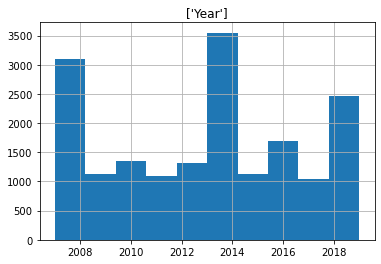

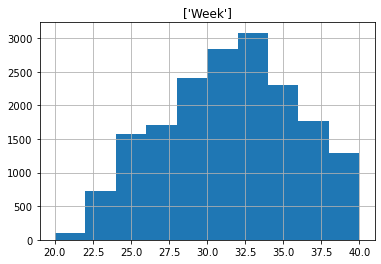

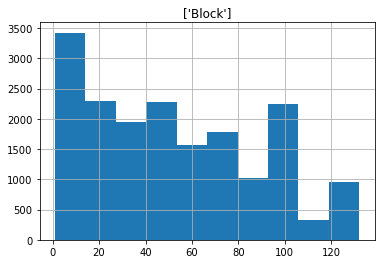

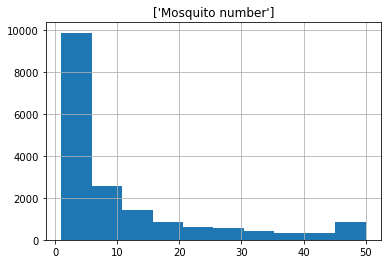

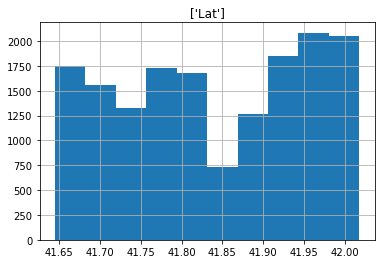

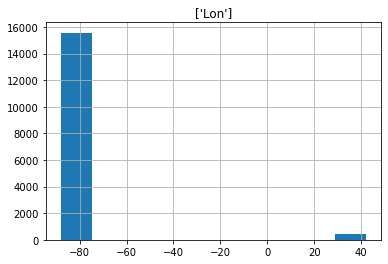

In [837]:
for col in num_df:
    num_df[col].hist()
    plt.title([col])
    plt.show()

##### Step 3: Create For Loop for `cat_df`
For cat_df, since the data types are categorical, we have more flexibility in terms of the variables and relationships we can include in a single plot.

Since the overall goal of the WNV testing sites and analysis is to move forward with a proactive approach towards WNV identification and mitigation, we'll utilize the same analysis we performed in Q3.1, but this time we'll generalize it for all variables and not just for mosquito species.

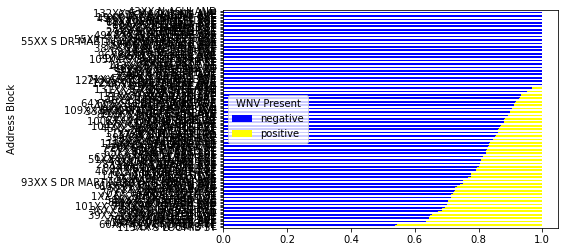

Address Block             WNV Present
100XX W OHARE             negative       0.926966
                          positive       0.073034
100XX W OHARE AIRPORT     negative       0.880587
                          positive       0.119413
101XX S STONY ISLAND AVE  negative       0.696477
                                           ...   
96XX S HOYNE AVE          negative       1.000000
96XX S LONGWOOD DR        negative       1.000000
98XX S AVENUE G           negative       1.000000
9XX W GARFIELD BLVD       negative       0.905882
                          positive       0.094118
Name: Address Block, Length: 255, dtype: float64


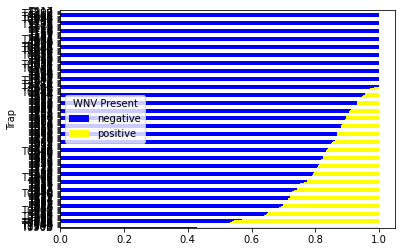

Trap   WNV Present
220A   negative       1.000000
T001   negative       1.000000
T002   negative       0.633005
       positive       0.366995
T002A  negative       1.000000
                        ...   
T923   positive       0.068182
T924   negative       0.971429
       positive       0.028571
T925   negative       0.897436
       positive       0.102564
Name: Trap, Length: 313, dtype: float64


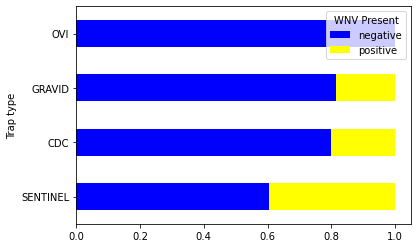

Trap type  WNV Present
CDC        negative       0.799622
           positive       0.200378
GRAVID     negative       0.815943
           positive       0.184057
OVI        negative       1.000000
SENTINEL   negative       0.602871
           positive       0.397129
Name: Trap type, dtype: float64


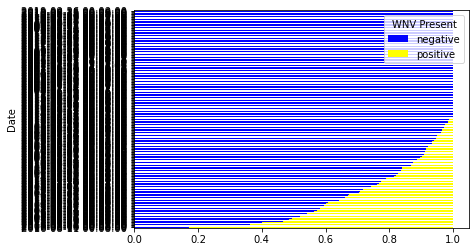

Date                 WNV Present
2007-05-29 00:05:00  negative       1.000000
2007-06-05 00:06:00  negative       1.000000
2007-06-26 04:06:06  negative       1.000000
2007-06-26 04:06:07  negative       1.000000
2007-06-26 04:06:56  negative       1.000000
                                      ...   
2019-09-05 00:09:00  positive       0.121951
2019-09-12 00:09:00  negative       0.779661
                     positive       0.220339
2019-09-19 00:09:00  negative       1.000000
2019-09-26 00:09:00  negative       1.000000
Name: Date, Length: 450, dtype: float64


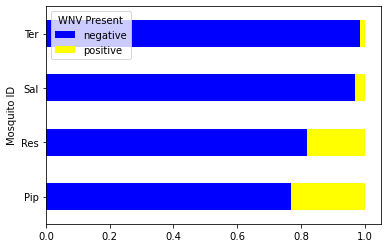

Mosquito ID  WNV Present
Pip          negative       0.767087
             positive       0.232913
Res          negative       0.817511
             positive       0.182489
Sal          negative       0.968468
             positive       0.031532
Ter          negative       0.984733
             positive       0.015267
Name: Mosquito ID, dtype: float64


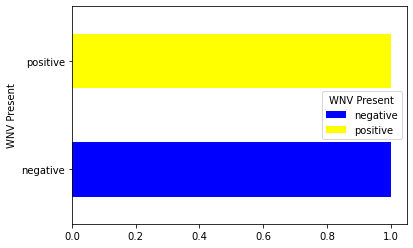

WNV Present  WNV Present
negative     negative       1.0
positive     positive       1.0
Name: WNV Present, dtype: float64


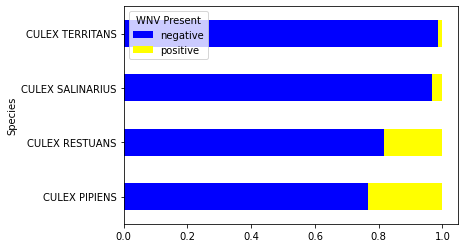

Species           WNV Present
CULEX PIPIENS     negative       0.767087
                  positive       0.232913
CULEX RESTUANS    negative       0.817511
                  positive       0.182489
CULEX SALINARIUS  negative       0.968468
                  positive       0.031532
CULEX TERRITANS   negative       0.984733
                  positive       0.015267
Name: Species, dtype: float64


In [838]:
for col in cat_df:
    wnv_prev = df2.groupby([col, 'WNV Present'])[col].count() / df2.groupby(col)[col].count()
    wnv_prev.unstack().sort_values(by = 'negative').plot(kind = 'barh', stacked = True, color = ['blue', 'yellow'])
    plt.show()
    print(wnv_prev)

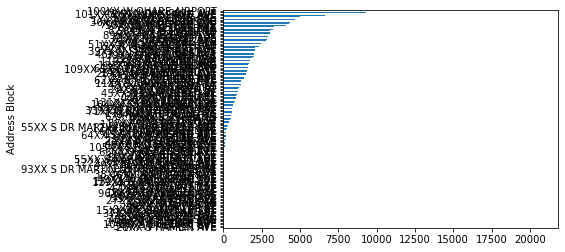

Address Block
21XX S HAMLIN AVE               1
54XX W PARKER AVE               2
104XX S OGLESBY AVE             2
65XX S RACINE AVE               2
29XX N KENNETH AVE              3
                            ...  
52XX S KOLMAR AVE            4974
70XX N MOSELLE AVE           6618
101XX S STONY ISLAND AVE     8117
41XX N OAK PARK AVE          9304
100XX W OHARE AIRPORT       20812
Name: Mosquito number, Length: 154, dtype: int64


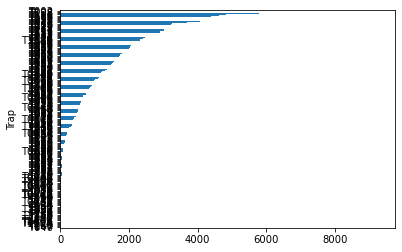

Trap
T040        1
T167        1
T241        2
T078        2
T128A       2
         ... 
T114     4634
T115     4822
T138     5787
T008     6618
T002     9285
Name: Mosquito number, Length: 190, dtype: int64


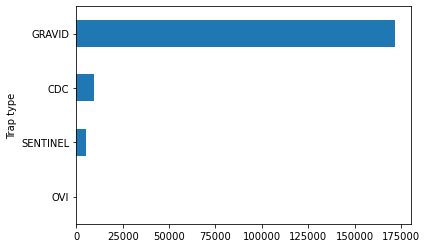

Trap type
OVI              1
SENTINEL      5134
CDC           9514
GRAVID      171905
Name: Mosquito number, dtype: int64


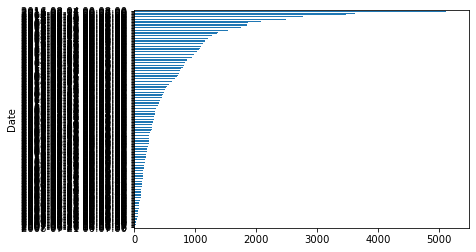

Date
2008-07-21 00:07:00       5
2007-06-26 04:06:56      12
2007-06-26 04:06:07      18
2007-07-27 11:07:17      21
2007-06-26 04:06:59      23
                       ... 
2014-07-31 00:07:00    3622
2014-08-21 00:08:00    4005
2016-08-11 00:08:00    4838
2016-07-27 00:07:00    5118
2016-08-04 00:08:00    5235
Name: Mosquito number, Length: 298, dtype: int64


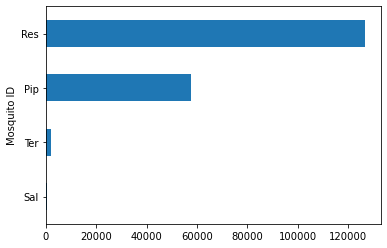

Mosquito ID
Sal       446
Ter      1810
Pip     57657
Res    126641
Name: Mosquito number, dtype: int64


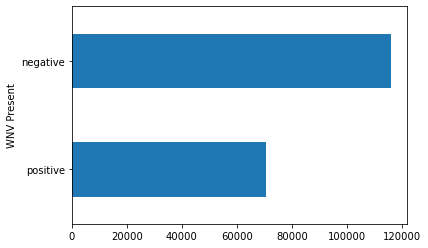

WNV Present
positive     70627
negative    115927
Name: Mosquito number, dtype: int64


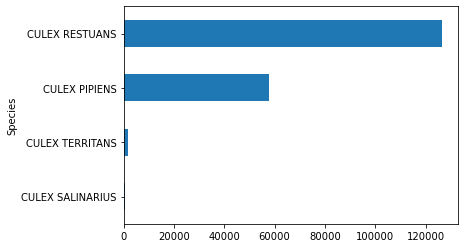

Species
CULEX SALINARIUS       446
CULEX TERRITANS       1810
CULEX PIPIENS        57657
CULEX RESTUANS      126641
Name: Mosquito number, dtype: int64


In [840]:
for col in cat_df:
    m_count = df2.groupby([col])['Mosquito number'].sum().sort_values()
    m_count.plot(kind = 'barh', stacked = True)
    plt.show()
    print(m_count)

Lastly, after seeing how the total volume of trap type, species, and tests seemed to effect positive test rates, I was curious in the potential relationship between the total number of mosquitos trapped, by Trap, and that Trap's positive test rate.

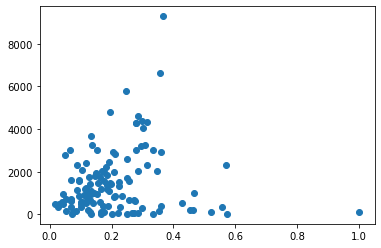

In [849]:
m_count = df2.groupby(['Trap'])['Mosquito number'].sum()

wnv_by_trap = df2.groupby(['Trap', 'WNV Present'])['Trap'].count() / df2.groupby('Trap')['Trap'].count()
x = wnv_by_trap.unstack()['positive']

plt.figure()
plt.scatter(x, m_count)
plt.show()

## Summary Findings

`1. Summer weeks are the most popular times for testing and when the largest number of mosquitos are trapped.`

`2. Culex Pipiens & Culex Restuans are the most common mosquito types in the city of Chicago and are also the most likely to be found with West Nile Virus`

`3. GRAVID is the most commonly utilized Trap Type, with relatively high positive counts. However, SENTINEL has significantly higher positive rates of the mosquitos it traps. Since it is used seldomly, the high positive rate may be help pinpoint at-risk areas within the city.`

`4. Lastly, and perhaps most importantly, outside of a few outliers, there seems to be a very strong relationship between the total number of mosquitos tested and a postiive test result across the city. This insuates that trapping and testing should most likely be ramped up across the city, as there could be the potential for a much higher positive test rate.`